In [1]:
# Carregando bibliotecas
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [116]:
# Carregando imagens
imagem_cinza_a = Image.open("imagens/luzes_de_rua.jpg").convert('L')
imagem_cinza_b = Image.open("imagens/luzes_de_rua.jpg").convert('L')

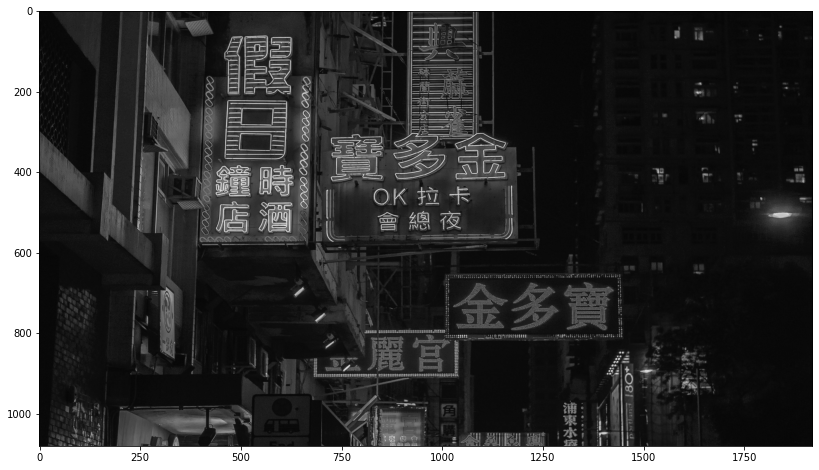

In [117]:
# Figura acinzentada
plt.figure(figsize = (14, 8))
plt.imshow(imagem_cinza_a, cmap = "gray")
plt.show()

In [118]:
imagem_cinza = np.asarray(imagem_cinza_a)
imagem_filtrada = np.asarray(imagem_cinza_b)

# Tratando as bordas
imagem_filtrada[0] = imagem_filtrada[0]*0
imagem_filtrada[-1] = imagem_filtrada[-1]*0
imagem_filtrada[..., 0] = imagem_filtrada[..., 0]*0
imagem_filtrada[..., -1] = imagem_filtrada[..., -1]*0

imagem_cinza[0] = imagem_cinza[0]*0
imagem_cinza[-1] = imagem_cinza[-1]*0
imagem_cinza[..., 0] = imagem_cinza[..., 0]*0
imagem_cinza[..., -1] = imagem_cinza[..., -1]*0

In [119]:
# Usaremos o kernel Laplaciano comum para detectar bordas
laplacian = np.array(([0, -1, 0],
                      [-1, 4, -1],
                      [0, -1, 0]), dtype="int")

# Aplicando o kernel em toda a matriz
# Colunas
for j in range(len(imagem_filtrada[..., 0]) - 2):
    #Linhas
    for i in range(len(imagem_filtrada[0]) - 2):
            # Kernel em minimatrizes
            multiplicacao = laplacian * imagem_cinza[j:3 + j, i:3 + i]
            # Soma final e substituição na matriz original
            soma = np.sum(multiplicacao)
            if soma < 0:
                soma = 0
            imagem_filtrada[1 + j, 1 + i] = soma

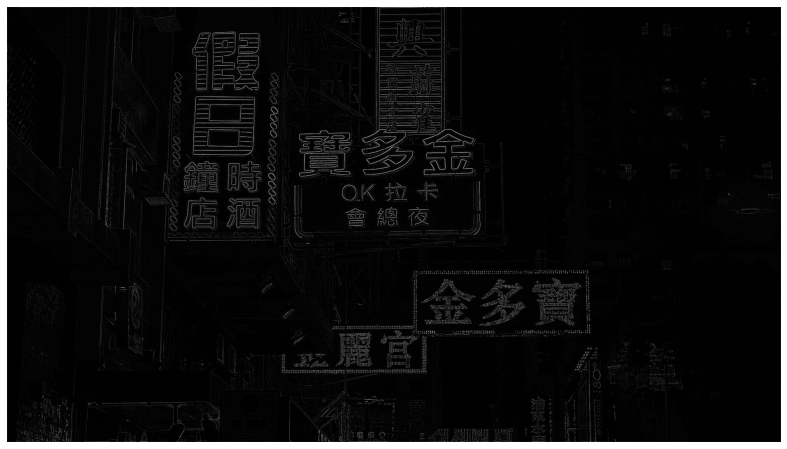

In [120]:
# Filtro laplaciano final
plt.figure(figsize = (14, 8))
plt.imshow(imagem_filtrada, cmap = "gray")
plt.axis('off')
plt.savefig('imagens/filtragem_laplaciano.png', bbox_inches='tight', pad_inches=0)
plt.show()

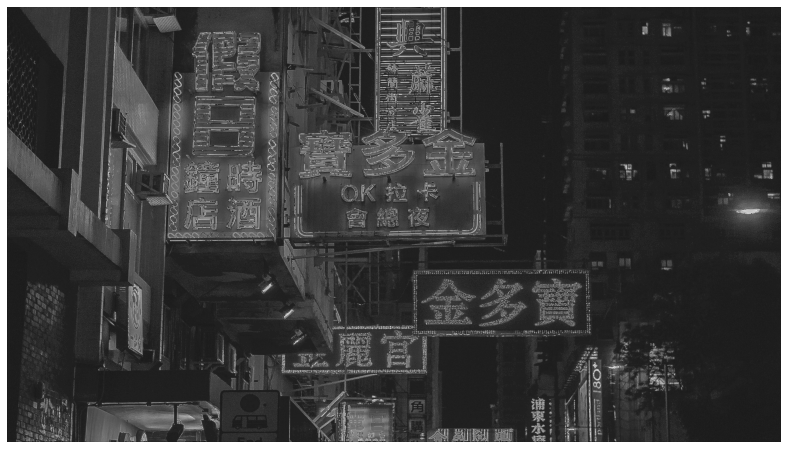

In [121]:
# Imagem original + filtro
img2 = imagem_filtrada + imagem_cinza

plt.figure(figsize = (14, 8))
plt.imshow(img2, cmap = "gray")
plt.axis('off')
plt.savefig('imagens/imagem_laplaciano.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [124]:
# Reimportando imagens para uso de outro filtro
imagem_cinza_a = Image.open("imagens/luzes_de_rua.jpg").convert('L')
imagem_cinza_b = Image.open("imagens/luzes_de_rua.jpg").convert('L')

In [125]:
imagem_cinza = np.asarray(imagem_cinza_a)
imagem_filtrada = np.asarray(imagem_cinza_b)

# Tratando as bordas
imagem_filtrada[0] = imagem_filtrada[0]*0
imagem_filtrada[-1] = imagem_filtrada[-1]*0
imagem_filtrada[..., 0] = imagem_filtrada[..., 0]*0
imagem_filtrada[..., -1] = imagem_filtrada[..., -1]*0

imagem_cinza[0] = imagem_cinza[0]*0
imagem_cinza[-1] = imagem_cinza[-1]*0
imagem_cinza[..., 0] = imagem_cinza[..., 0]*0
imagem_cinza[..., -1] = imagem_cinza[..., -1]*0

In [126]:
# Usaremos o kernel de suavizacao comum
suavizacao = np.array(([1, 3, 1],
                      [3, 16, 3],
                      [1, 3, 1]), dtype="int")

suavizacao = suavizacao/32

# Aplicando o kernel em toda a matriz
# Colunas
for j in range(len(imagem_filtrada[..., 0]) - 2):
    #Linhas
    for i in range(len(imagem_filtrada[0]) - 2):
            # Kernel em minimatrizes
            multiplicacao = suavizacao * imagem_cinza[j:3 + j, i:3 + i]
            # Soma final e substituição na matriz original
            soma = np.sum(multiplicacao)
            if soma < 0:
                soma = 0
            imagem_filtrada[1 + j, 1 + i] = soma


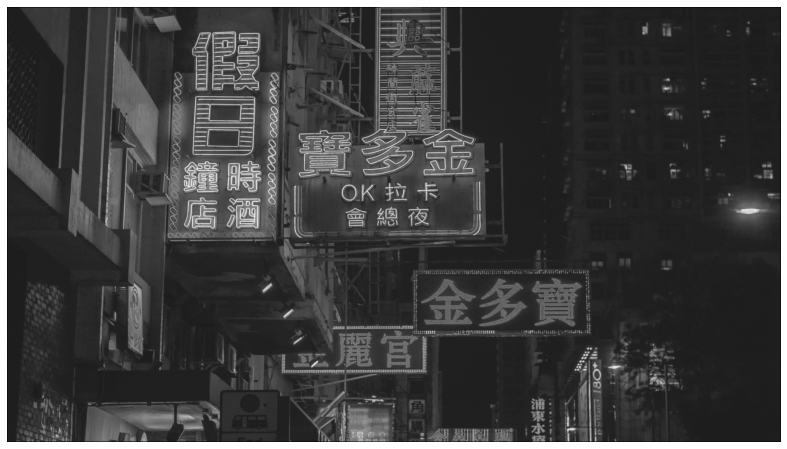

In [127]:
# Filtro de suavização final
plt.figure(figsize = (14, 8))
plt.imshow(imagem_filtrada, cmap = "gray")
plt.axis('off')
plt.savefig('imagens/filtragem_suavizacao.png', bbox_inches='tight', pad_inches=0)
plt.show()

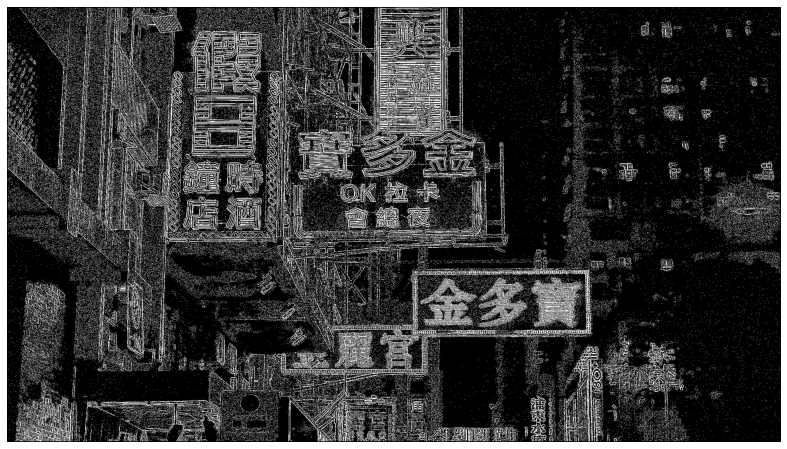

In [128]:
# Imagem original - filtro
img2 = imagem_cinza - imagem_filtrada

plt.figure(figsize = (14, 8))
plt.imshow(img2, cmap = "gray")
plt.axis('off')
plt.savefig('imagens/unsharpening.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [108]:
# Reimportando imagens para uso de outro filtro
imagem_cinza_a = Image.open("imagens/luzes_de_rua.jpg").convert('L')
imagem_cinza_b = Image.open("imagens/luzes_de_rua.jpg").convert('L')

In [109]:
imagem_cinza = np.asarray(imagem_cinza_a)
imagem_filtrada = np.asarray(imagem_cinza_b)

# Tratando as bordas
imagem_filtrada[0] = imagem_filtrada[0]*0
imagem_filtrada[-1] = imagem_filtrada[-1]*0
imagem_filtrada[..., 0] = imagem_filtrada[..., 0]*0
imagem_filtrada[..., -1] = imagem_filtrada[..., -1]*0

imagem_cinza[0] = imagem_cinza[0]*0
imagem_cinza[-1] = imagem_cinza[-1]*0
imagem_cinza[..., 0] = imagem_cinza[..., 0]*0
imagem_cinza[..., -1] = imagem_cinza[..., -1]*0

In [110]:
# Usaremos o kernel de sobel
sobel_vertical = np.array(([-1, -2, -1],
                      [0, 0, 0],
                      [1, 2, 1]), dtype="int")

sobel_horizontal = sobel_vertical.T

# Aplicando o kernel em toda a matriz
# Colunas
for j in range(len(imagem_filtrada[..., 0]) - 2):
    #Linhas
    for i in range(len(imagem_filtrada[0]) - 2):
            # Kernel em minimatrizes
            multiplicacao_x = sobel_horizontal * imagem_cinza[j:3 + j, i:3 + i]
            multiplicacao_y = sobel_vertical * imagem_cinza[j:3 + j, i:3 + i]
            # Soma final + gradiente e substituição na matriz original
            soma_x = np.sum(multiplicacao_x)
            soma_y = np.sum(multiplicacao_y)
            gradiente = np.sqrt(soma_x ** 2 + soma_y ** 2)
            if gradiente > 255:
                gradiente = 0
            imagem_filtrada[1 + j, 1 + i] = gradiente

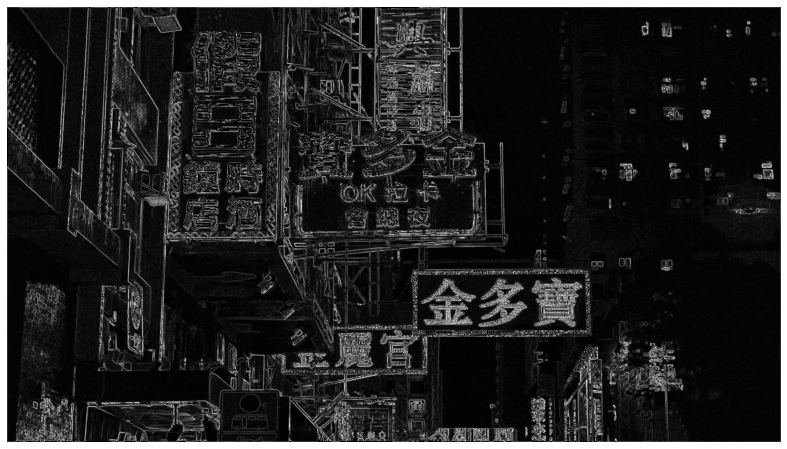

In [115]:
# Filtro de sobel final
plt.figure(figsize = (14, 8))
plt.imshow(imagem_filtrada, cmap = "gray")
plt.axis('off')
plt.savefig('imagens/sobel.png', bbox_inches='tight', pad_inches=0)
plt.show()